In [1]:
import json
import pathlib

import pandas as pd
import seaborn as sns

DATA_DIR = pathlib.Path('../data')

In [2]:
def load_data(data_dir):
    data = []
    for filepath in data_dir.glob('*.json'):
        with open(filepath) as f:
            data.extend(json.load(f))
    return data

In [3]:
def to_record(experiment):
    return {
        'board_id': experiment['gs']['boardID'],
        'ticks': experiment['gs']['tick'],
        'impossible_actions': experiment['gs']['impossibleActionCount'],
        'first_winner_tick': experiment['gs']['firstWinnerTick'],
        'heuristic': experiment['agentsParams'][0]['heuristic_method'],
    }

In [4]:
df = pd.DataFrame.from_records(to_record(x) for x in load_data(DATA_DIR))
df['success'] = df['ticks'] < 100
df['second_winner_lag'] = df['ticks'] - df['first_winner_tick']

## Success percentage

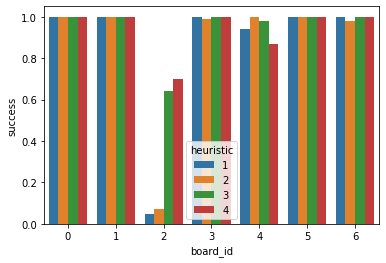

In [5]:
sns.barplot(
    y='success',
    x='board_id',
    hue='heuristic',
    data=df.groupby(['board_id', 'heuristic'])['success'].mean().reset_index(),
)

## Analysis including failures

### Ticks

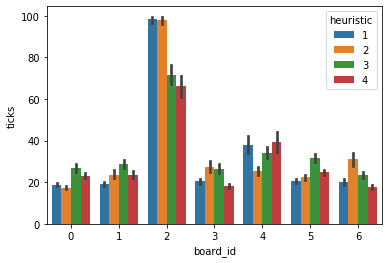

In [6]:
sns.barplot(
    y='ticks',
    x='board_id',
    hue='heuristic',
    data=df,
)

### Impossible actions

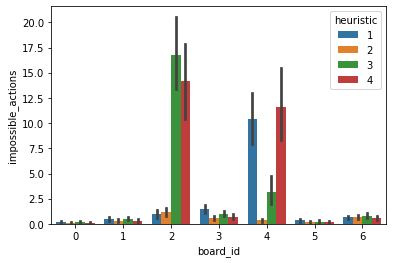

In [7]:
sns.barplot(
    y='impossible_actions',
    x='board_id',
    hue='heuristic',
    data=df,
)

### 2nd winner lag

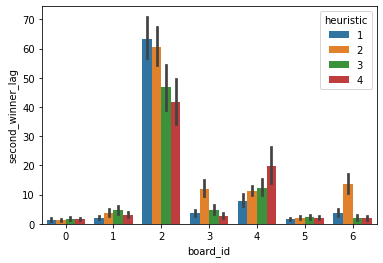

In [8]:
sns.barplot(
    y='second_winner_lag',
    x='board_id',
    hue='heuristic',
    data=df,
)

## Successfull runs only

### Ticks

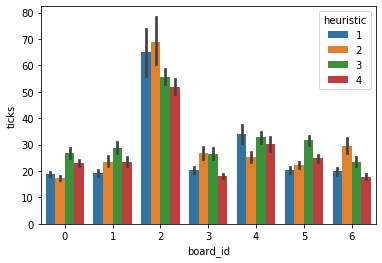

In [9]:
sns.barplot(
    y='ticks',
    x='board_id',
    hue='heuristic',
    data=df[df['success']],
)

### Impossible actions

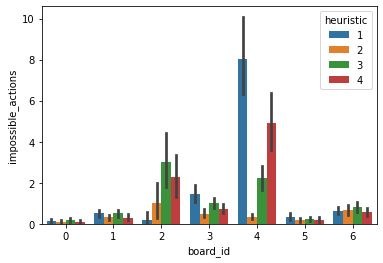

In [10]:
sns.barplot(
    y='impossible_actions',
    x='board_id',
    hue='heuristic',
    data=df[df['success']],
)

### 2nd winner lag

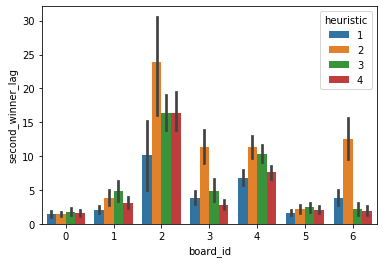

In [11]:
sns.barplot(
    y='second_winner_lag',
    x='board_id',
    hue='heuristic',
    data=df[df['success']],
)

## Pairwise everything!

Don't tell my supervisors :)

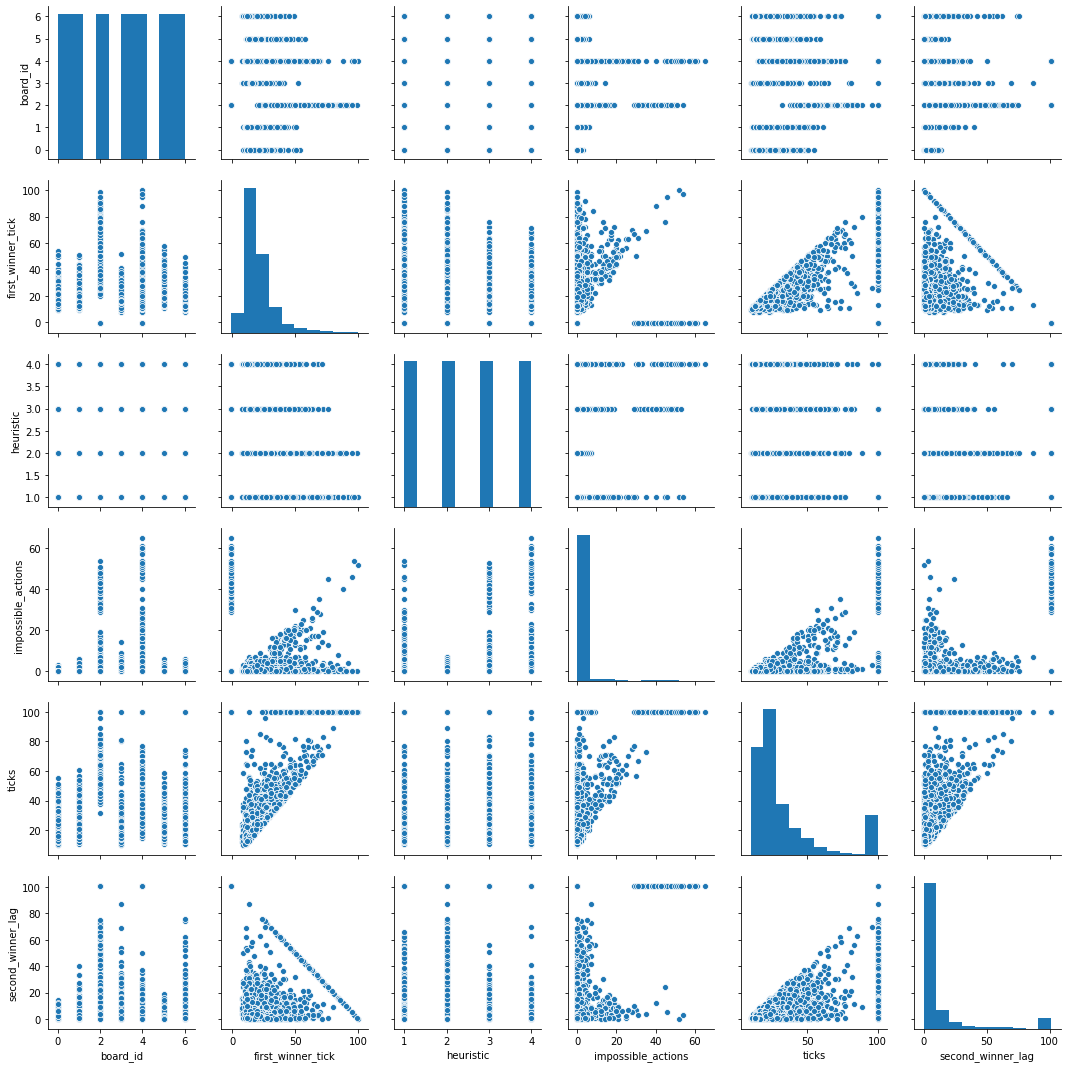

In [12]:
sns.pairplot(df.drop('success', axis=1))